In [2]:
from auth import auth
from problems import get_submissions, get_problems
from dotenv import dotenv_values

config = dotenv_values('.env')
username = config['USERNAME']
password = config['PASSWORD']
user = auth(username, password)

if user:
    get_problems(user)
    get_submissions(user)

Login successful
Scraping problems solved...
Scraping problems finished...
Scraping page 1 of submissions...
Scraping page 2 of submissions...
Scraping page 3 of submissions...
Scraping page 4 of submissions...


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_s = pd.DataFrame(user.submissions)
df_s.head()

,time,problem,language,status
0,2023-07-05 22:42:35,EpigDanceOff,Python 3,Accepted
1,2023-07-05 22:25:09,Inverted Deck,Python 3,Accepted
2,2023-07-05 22:21:10,Inverted Deck,Python 3,Wrong Answer
3,2023-07-05 21:49:59,Add Two Numbers,Python 3,Accepted
4,2023-07-04 22:40:41,Apaxiaaaaaaaaaaaans!,Python 3,Accepted


In [7]:
# make date column from time
df_s['date'] = pd.to_datetime(df_s['time']).dt.date
df_s.head()

,time,problem,language,status,date
0,2023-07-05 22:42:35,EpigDanceOff,Python 3,Accepted,2023-07-05
1,2023-07-05 22:25:09,Inverted Deck,Python 3,Accepted,2023-07-05
2,2023-07-05 22:21:10,Inverted Deck,Python 3,Wrong Answer,2023-07-05
3,2023-07-05 21:49:59,Add Two Numbers,Python 3,Accepted,2023-07-05
4,2023-07-04 22:40:41,Apaxiaaaaaaaaaaaans!,Python 3,Accepted,2023-07-04


In [8]:
def language_used():
    df = df_s.copy()

    language_counts = df['language'].value_counts()

    plt.bar(language_counts.index, language_counts.values)
    plt.xlabel('Programming Language')
    plt.ylabel('Frequency')
    plt.title('Language Usage')
    plt.show()

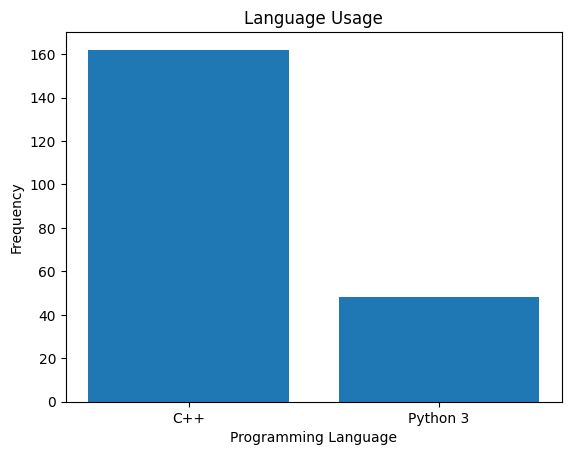

In [9]:
language_used()

In [24]:
def most_succesful_language():
    df = df_s.copy()
    
    accepted_df = df[df['status'] == 'Accepted']    
    not_accepted_df = df[df['status'] != 'Accepted']
    
    accepted_counts = accepted_df['language'].value_counts()
    not_accepted_counts = not_accepted_df['language'].value_counts()
    
    normalized_counts = accepted_counts / (accepted_counts + not_accepted_counts)
    
    plt.bar(normalized_counts.index, normalized_counts.values * 100)
    plt.xlabel('Programming Language')
    plt.ylabel('Acceptance Rate in Percentage')
    plt.title('Most Successful Language')
    plt.show()

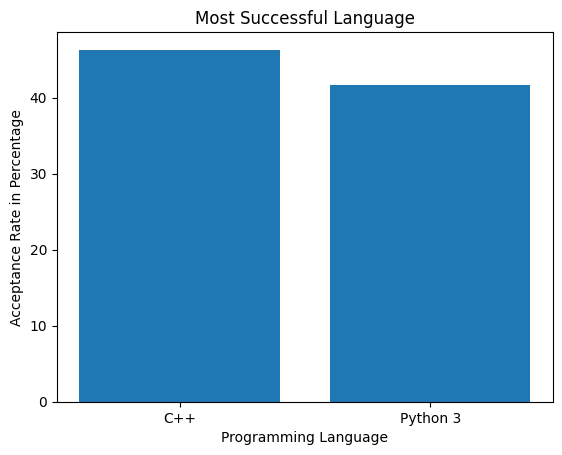

In [25]:
most_succesful_language()